In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats, special
import statistics
from statistics import multimode

# Teil I - Beschreibende Statistik

In [87]:
data = [11, 11, 13, 9, 10, 7, 3, 8, 9, 4]

## 01. Charakterisierung einer Stichprobe

### 01.1 Häufigkeitsverteilung einer Stichprobe

Länge 10
Verschiedene Werte [ 3  4  7  8  9 10 11 13]
Absolute Häufigkeiten [ 3  4  7  8  9 10 11 13] [1 1 1 1 2 1 2 1]
Relative Häufigkeiten [0.1 0.1 0.1 0.1 0.2 0.1 0.2 0.1]


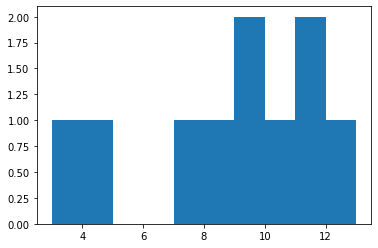

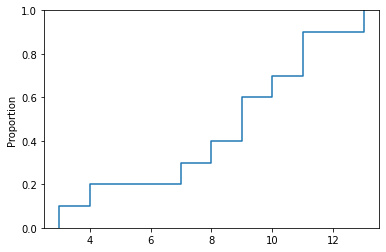

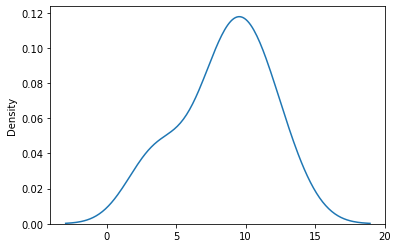

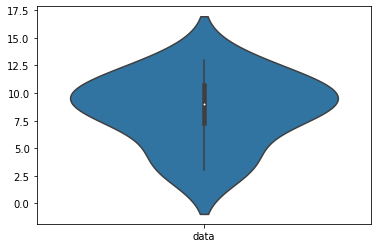

In [88]:
print('Länge', len(data))
print('Verschiedene Werte', np.unique(data))

# Häufigkeiten
data_unique, data_unique_counts = np.unique(data, return_counts=True)
print('Absolute Häufigkeiten', data_unique, data_unique_counts)
print('Relative Häufigkeiten', data_unique_counts / len(data))

# Histogramm
plt.hist(data)
plt.show()

# Verteilungsfunktion (CDF)
sns.ecdfplot(data)
plt.show()

# Kernel Density Estimation (KDE)
sns.kdeplot(data)
plt.show()

# Violinplot
df = pd.DataFrame({'data': pd.Series(data, dtype='int'), 'art': pd.Series(['a', 'b', 'a', 'c', 'd', 'a', 'd', 'c', 'c', 'a'], dtype='category')})
sns.violinplot(data=df)
plt.show()

### 01.2 Kennwerte einer Stichprobe

In [89]:
print('data', data)
print('Arithmetisches Mittel', np.mean(data))
print('Median', np.median(data))
print('Modalwert(e)', multimode(data))
print('25% Quantil', np.quantile(data, q=0.25, method='midpoint'))
print('75% Quantil', np.quantile(data, q=0.75, method='midpoint'))
print('95% Quantil', np.quantile(data, q=0.95, method='midpoint'))
print('Empirische Varianz', np.var(data, ddof=1))
print('Empirische Standardabweichung', np.std(data, ddof=1))
print('Spannweite', max(data) - min(data))
print('Interquartilabstand', stats.iqr(data))
print('Empirische Schiefe', stats.skew(data))
print('Empirische Wölbung', stats.kurtosis(data))

data [11, 11, 13, 9, 10, 7, 3, 8, 9, 4]
Arithmetisches Mittel 8.5
Median 9.0
Modalwert(e) [11, 9]
25% Quantil 7.5
75% Quantil 10.5
95% Quantil 12.0
Empirische Varianz 9.833333333333334
Empirische Standardabweichung 3.13581462037113
Spannweite 10
Interquartilabstand 3.5
Empirische Schiefe -0.5127655770402821
Empirische Wölbung -0.671646078713013


## 02. Lineare Korrelation und Regression

In [99]:
data_b = [25, 22, 18, 15, 11, 12, 4, 13, 17, 4]
data_c = [11, 244, 23, 94, 1, 34, 131, 43, 3, 12]

### 02.1 Lineare Korrelation

Korrelationskoeffizient 
 [[1.         0.85861651]
 [0.85861651 1.        ]]
Kovarianz 
 [[ 9.83333333 18.5       ]
 [18.5        47.21111111]]


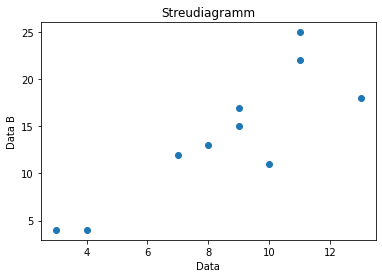

[Text(0.5, 1.0, 'Korrelationsmatrix')]

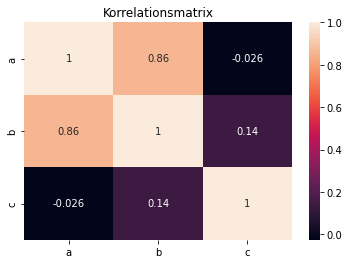

In [104]:
print('Korrelationskoeffizient \n', np.corrcoef(data, data_b))
print('Kovarianz \n', np.cov(data, data_b))

# Streudiagramm
fig, ax = plt.subplots() 
plt.plot(data, data_b, 'o') 
ax.set_title('Streudiagramm')
ax.set_xlabel('Data') 
ax.set_ylabel('Data B') 
plt.show()

# Korrelations Heatmap
df_corr = pd.DataFrame({'a': pd.Series(data), 'b': pd.Series(data_b), 'c': pd.Series(data_c)})
corr = df_corr.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True).set(title='Korrelationsmatrix')

### 02.2 Lineare Regression

Regressionsgerade 
 LinregressResult(slope=1.8813559322033901, intercept=-1.891525423728817, rvalue=0.8586165136511121, pvalue=0.001468657872428383, stderr=0.3971192830664891, intercept_stderr=3.5762790853261084)


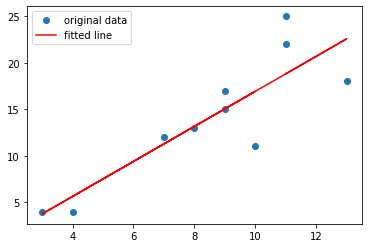

In [92]:
print('Regressionsgerade \n', stats.linregress(data, data_b))

# Regressionsgerade in Streudiagramm
reg = stats.linregress(data, data_b) 
plt.plot(data, data_b, 'o', label='original data') 
plt.plot(data, reg.intercept + reg.slope * np.asarray(data), 'r', label='fitted line') 
plt.legend() 
plt.show()

# Teil II - Diskrete Wahrscheinlichkeitstheorie

## 01. Wahrscheinlichkeitsrechnung

In [93]:
k = 2
n = 7

### 01.1 Kombinatorik

![](./assets/kombinatorik.png)

In [108]:
print('Permutation (ohne Wiederholung)', special.factorial(n, exact=True))
print('Variation (ohne Wiederholung)', special.perm(n, k, exact=True))
print('Variationen (mit Wiederholung)', pow(n, k))
print('Kombination (ohne Wiederholung)', special.comb(n, k, repetition=False, exact=True))
print('Kombination (mit Wiederholung)', special.comb(n, k, repetition=True, exact=True))

Permutation (ohne Wiederholung) 5040
Variation (ohne Wiederholung) 42
Variationen (mit Wiederholung) 49
Kombination (ohne Wiederholung) 21
Kombination (mit Wiederholung) 28


## 02. Zufallsvariablen

In [109]:
# Zur Demonstration wird ein Würfel mit acht Seiten 
# und folgender Verteilung der Zahlen verwendet:
X = [1,1,1,1,2,3,3,3]

Träger / Wertemenge [1. 2. 3.]
Relative Verteilung [0.5   0.125 0.375]
Absolute Verteilung [4. 1. 3.]


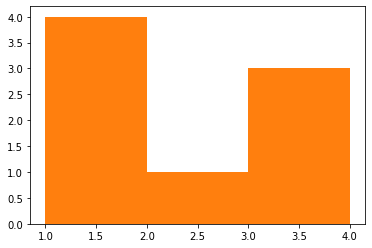

Verteilungsfunktion [0.5   0.625 1.   ]
Erwartungswert 1.875
Varianz 0.859375
Standardabweichung 0.9270248108869579


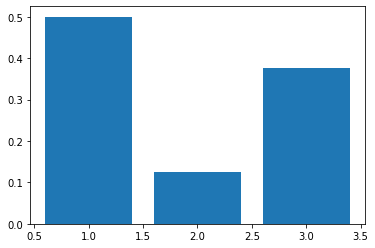

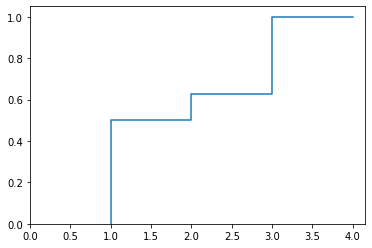

In [138]:
# Träger / Wertemenge
T = np.linspace(1, 3, 3)
print('Träger / Wertemenge', T)

# Verteilung
p, _, _ = plt.hist(X, np.linspace(1,4,4), density=True)
n, _, _ = plt.hist(X, np.linspace(1,4,4), density=False)
print('Relative Verteilung', p)
print('Absolute Verteilung', n)
plt.show()

print('Verteilungsfunktion', np.cumsum(p))
print('Erwartungswert', np.sum(T * p))
print('Varianz', np.var(X, ddof=0))
print('Standardabweichung', np.std(X, ddof=0))

# Verteilung zeichnen
plt.bar(T, p)
plt.show()

# Verteilungsfunktion zeichnen
y = np.concatenate((np.array([0]), np.cumsum(p)))
plt.step(np.linspace(1,4,4), y)
plt.xlim(0)
plt.ylim(0)
plt.show()


## 03. Wichtige diskrete Verteilungen

### 03.1 Bernoulli-Verteilung

In [146]:
p = 0.7

print('Verteilung')
print('P(X = 0)', stats.bernoulli(p).pmf(0))
print('P(X = 1)', stats.bernoulli(p).pmf(1))

print('Verteilungsfunktion')
print('P(X <= -1)', stats.bernoulli(p).cdf(-1))
print('P(X <= 0)', stats.bernoulli(p).cdf(0))
print('P(X <= 1)', stats.bernoulli(p).cdf(1))

print('Erwartungswert', stats.bernoulli(p).expect())
print('Varianz', stats.bernoulli(p).var())

Verteilung
P(X = 0) 0.30000000000000004
P(X = 1) 0.7
Verteilungsfunktion
P(X <= -1) 0.0
P(X <= 0) 0.30000000000000004
P(X <= 1) 1.0
Erwartungswert 0.7
Varianz 0.21000000000000002


### 03.2 Geometrische Verteilung

In [149]:
p = 0.7

print('Verteilung')
print('P(X = 0)', stats.geom(p).pmf(0))
print('P(X = 1)', stats.geom(p).pmf(1))
print('P(X = 2)', stats.geom(p).pmf(2))

print('Verteilungsfunktion')
print('P(X <= 0)', stats.geom(p).cdf(0))
print('P(X <= 1)', stats.geom(p).cdf(1))
print('P(X <= 2)', stats.geom(p).cdf(2))
print('P(X <= 3)', stats.geom(p).cdf(3))

print('Erwartungswert', stats.geom(p).expect())
print('Varianz', stats.geom(p).var())

Verteilung
P(X = 0) 0.0
P(X = 1) 0.7
P(X = 2) 0.21000000000000002
Verteilungsfunktion
P(X <= 0) 0.0
P(X <= 1) 0.7
P(X <= 2) 0.91
P(X <= 3) 0.973
Erwartungswert 1.4285714285714286
Varianz 0.6122448979591838


### 03.3 Binomialverteilung

In [150]:
n = 4
p = 0.2

print('Verteilung')
print('P(X = 3)', stats.binom(n, p).pmf(3))

print('Verteilungsfunktion')
print('P(X <= 3)', stats.binom(n, p).cdf(3))

print('Erwartungswert', stats.binom(n, p).expect())
print('Varianz', stats.binom(n, p).var())

Verteilung
P(X = 3) 0.02559999999999999
Verteilungsfunktion
P(X <= 3) 0.9984
Erwartungswert 0.7999999999999998
Varianz 0.6400000000000001


### 03.4 Hypergeometrische Verteilung

In [152]:
n = 8
N = 50
M = 45

print('Verteilung')
print('P(X = 5)', stats.hypergeom(N, M, n).pmf(5))

print('Verteilungsfunktion')
print('P(X <= 5)', stats.hypergeom(N, M, n).cdf(5))

print('Erwartungswert', stats.hypergeom(N, M, n).expect())
print('Varianz', stats.hypergeom(N, M, n).var())

Verteilung
P(X = 5) 0.022756706753006478
Verteilungsfunktion
P(X <= 5) 0.024170741377031853
Erwartungswert 7.200000000000001
Varianz 0.6171428571428571


### 03.5 Poissonverteilung

In [151]:
l = 2

print('Verteilung')
print('P(X = 5)', stats.poisson(l).pmf(5))

print('Verteilungsfunktion')
print('P(X <= 5)', stats.poisson(l).cdf(5))

print('Erwartungswert', stats.poisson(l).expect())
print('Varianz', stats.poisson(l).var())

Verteilung
P(X = 5) 0.03608940886309672
Verteilungsfunktion
P(X <= 5) 0.9834363915193856
Erwartungswert 2.0
Varianz 2.0


# Teil III - Kontinuierliche Wahrscheinlichkeitstheorie

## 01. Wichtige stetige Verteilungen

### 01.1 Gleichverteilung

In [161]:
a = 2
b = 10

print('Verteilungsdichte')
print('P(X = 0)', stats.uniform(a,b-a).pdf(0))
print('P(X = 2)', stats.uniform(a,b-a).pdf(2))
print('P(X = 6)', stats.uniform(a,b-a).pdf(6.3123))
print('P(X = 10)', stats.uniform(a,b-a).pdf(10))
print('P(X = 12)', stats.uniform(a,b-a).pdf(12))

print('Verteilungsfunktion')
print('P(X <= 0)', stats.uniform(a,b-a).cdf(0))
print('P(X <= 2)', stats.uniform(a,b-a).cdf(2))
print('P(X <= 5)', stats.uniform(a,b-a).cdf(5))
print('P(X <= 7)', stats.uniform(a,b-a).cdf(7))
print('P(X <= 10)', stats.uniform(a,b-a).cdf(10))

print('p-Quantil')
print('10% Quantil', stats.uniform(a,b-a).ppf(0.1))
print('75% Quantil', stats.uniform(a,b-a).ppf(0.75))
print('100% Quantil', stats.uniform(a,b-a).ppf(1.0))

print('Erwartungswert', stats.uniform(a,b-a).expect())
print('Varianz', stats.uniform(a,b-a).var())

Verteilungsdichte
P(X = 0) 0.0
P(X = 2) 0.125
P(X = 6) 0.125
P(X = 10) 0.125
P(X = 12) 0.0
Verteilungsfunktion
P(X <= 0) 0.0
P(X <= 2) 0.0
P(X <= 5) 0.375
P(X <= 7) 0.625
P(X <= 10) 1.0
p-Quantil
10% Quantil 2.8
75% Quantil 8.0
100% Quantil 10.0
Erwartungswert 6.0
Varianz 5.333333333333333
